In [3]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import ssl
import urllib.request
ssl._create_default_https_context = ssl._create_unverified_context

In [4]:
print("fetching data")
fashion_mnist = fetch_openml(name="FASHION-MNIST", as_frame=False)
targets = fashion_mnist.target.astype(int)
print("Done")

x_train, y_train = fashion_mnist.data[:60_000], targets[:60_000]
x_test, y_test = fashion_mnist.data[60_000:], targets[60_000:]

fetching data
Done


9


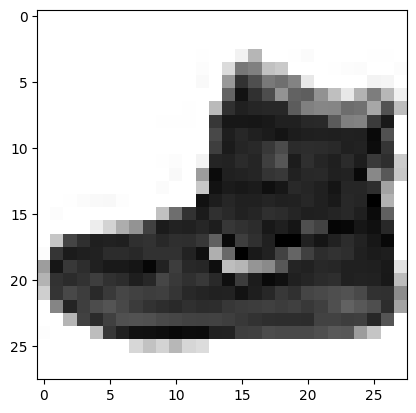

In [21]:
x_sample = x_train[0].reshape(28, 28)
print(y_train[0])
plt.imshow(x_sample, cmap="binary")
plt.show()

In [22]:
class_names = ["Top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Boot"]
class_names[y_train[0]]

'Boot'

In [26]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline

In [27]:
classifier = MLPClassifier(hidden_layer_sizes=[300, 100], verbose=True, early_stopping=True, random_state=42)
pipeline = make_pipeline(MinMaxScaler(), classifier)
pipeline.fit(x_train, y_train)
accuracy = pipeline.score(x_test, y_test)

Iteration 1, loss = 0.55394420
Validation score: 0.854833
Iteration 2, loss = 0.39017365
Validation score: 0.867500
Iteration 3, loss = 0.34572472
Validation score: 0.877500
Iteration 4, loss = 0.31541926
Validation score: 0.881167
Iteration 5, loss = 0.29351007
Validation score: 0.887167
Iteration 6, loss = 0.28459028
Validation score: 0.889167
Iteration 7, loss = 0.26775210
Validation score: 0.885500
Iteration 8, loss = 0.25610516
Validation score: 0.886667
Iteration 9, loss = 0.24488907
Validation score: 0.893167
Iteration 10, loss = 0.23915583
Validation score: 0.888500
Iteration 11, loss = 0.22290961
Validation score: 0.897167
Iteration 12, loss = 0.21925185
Validation score: 0.889667
Iteration 13, loss = 0.21249406
Validation score: 0.892167
Iteration 14, loss = 0.20374069
Validation score: 0.891333
Iteration 15, loss = 0.19557455
Validation score: 0.893833
Iteration 16, loss = 0.19099949
Validation score: 0.893667
Iteration 17, loss = 0.18445775
Validation score: 0.890333
Iterat

In [28]:
xnew = x_test[:15]
classifier.predict(xnew)

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 5, 3, 4])

In [33]:
prb = classifier.predict_proba(xnew)
prb[12]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])